# Cardio Good Fitness Project
Rituparna Basu
August, 2021

# Background and Objective: 
* Dataset is available for customers of the treadmill product(s) of a retail store called Cardio Good Fitness
* Goal is to analyze the customer data and define a customer profile (characteristics of a customer) of the different products 
* Perform uni-variate and multi-variate analyses 
* Generate a set of insights and recommendations that will help the company in targeting new customers 

## Data description
Detailed data dictionary is given below.

1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run


In [4]:
# Set up environment

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta
import seaborn as sns
from scipy import stats

import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# To help with model building
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')


In [5]:
import os
# shows the current working directory
os.getcwd()

'C:\\Users\\Rituparna Basu\\Documents\\Datascience_Projects_Basu\\Fitness Equip Project'

## Data loading and sanity check

In [6]:
# Read in the data

cdf = pd.read_csv("cardiogoodfitness.csv")

In [7]:
# To display all columns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
cdf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [10]:
cdf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
cdf.shape

(180, 9)

## Data cleaning

* Check duplicate value
* Check missing value
* Deal with missing value
* Drop unnecessary columns
* Check data type of all columns

In [12]:
duplicate = cdf[cdf.duplicated()]
# duplicate=cdf.duplicated(subset=None, keep='first')
duplicate

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


* No duplicate rows

In [13]:
# Find the missing values for each variable.

cdf.isnull().sum().sort_values(ascending=False)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [14]:
# Find Unique values

cdf.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [15]:
backup = cdf.copy()

In [16]:
cdf['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [17]:
cdf['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [18]:
cdf['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [19]:
cdf1 = cdf.copy()

## Outlier Detection

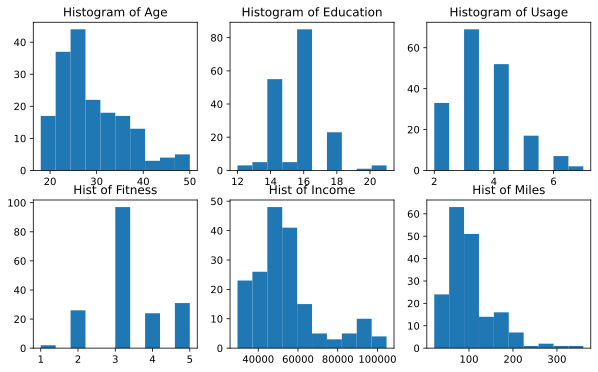

In [20]:
plt.figure(figsize = (10,6))

plt.subplot(2,3,1)
plt.hist(cdf1["Age"])
plt.title("Histogram of Age")

plt.subplot(2,3,2)
plt.hist(cdf1["Education"])
plt.title("Histogram of Education")


plt.subplot(2,3,3)
plt.hist(cdf1["Usage"])
plt.title("Histogram of Usage")

plt.subplot(2,3,4)
plt.hist(cdf1["Fitness"])
plt.title("Hist of Fitness")

plt.subplot(2,3,5)
plt.hist(cdf1["Income"])
plt.title("Hist of Income")


plt.subplot(2,3,6)
plt.hist(cdf["Miles"])
plt.title("Hist of Miles")

plt.show()

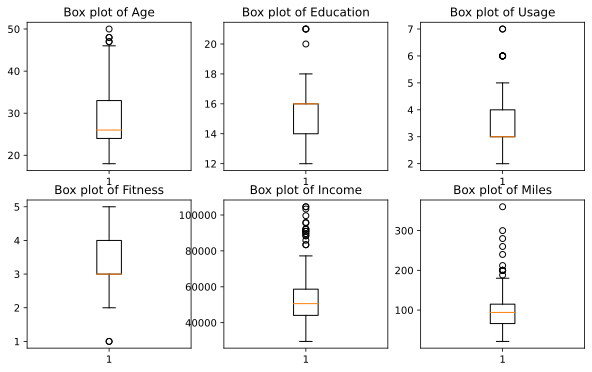

In [21]:
plt.figure(figsize = (10,6))

plt.subplot(2,3,1)
plt.boxplot(cdf1["Age"], whis = 1.5)
plt.title("Box plot of Age")

plt.subplot(2,3,2)
plt.boxplot(cdf1["Education"], whis = 1.5)
plt.title("Box plot of Education")

plt.subplot(2,3,3)
plt.boxplot(cdf1["Usage"], whis = 1.5)
plt.title("Box plot of Usage")

plt.subplot(2,3,4)
plt.boxplot(cdf1["Fitness"], whis = 1.5)
plt.title("Box plot of Fitness")

plt.subplot(2,3,5)
plt.boxplot(cdf1["Income"], whis = 1.5)
plt.title("Box plot of Income")

plt.subplot(2,3,6)
plt.boxplot(cdf1["Miles"], whis = 1.5)
plt.title("Box plot of Miles")

plt.show()

 ** The resulting box of Income is quite compressed and there seem to be a lot of outliers in the variable. So try adjusting  threshold to whis=20

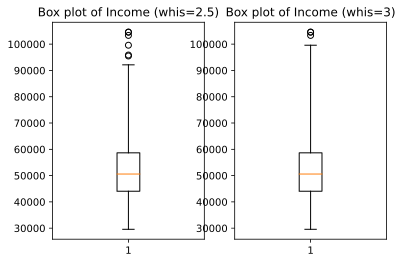

In [22]:
plt.figure(figsize = (6,4))

plt.subplot(1,2,1)
plt.boxplot(cdf1["Income"], whis=2.5)
plt.title("Box plot of Income (whis=2.5)")

plt.subplot(1,2,2)
plt.boxplot(cdf1["Income"], whis=3)
plt.title("Box plot of Income (whis=3)")

plt.show()

In [23]:
cdf2 = cdf1.copy()

In [24]:
from scipy.stats.mstats import winsorize

In [25]:
cdf2['win_Age'] = winsorize(cdf2["Age"], (0.0, 0.03))

cdf2['win_Education'] = winsorize(cdf2["Education"], (0.0, 0.03))

cdf2['win_Usage'] = winsorize(cdf2["Usage"], (0.0, 0.05))

cdf2['win_Fitness'] = winsorize(cdf2["Fitness"], (0.03, 0.00))

cdf2['win_Income'] = winsorize(cdf2["Income"], (0.00, 0.03))

cdf2['win_Miles'] = winsorize(cdf2["Miles"], (0.0, 0.05))

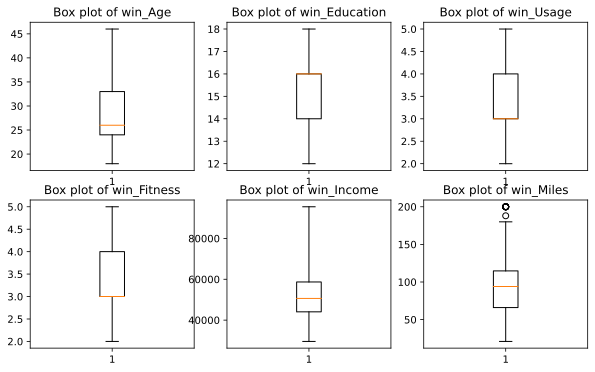

In [26]:
plt.figure(figsize = (10,6))

plt.subplot(2,3,1)
plt.boxplot(cdf2["win_Age"], whis = 1.5)
plt.title("Box plot of win_Age")

plt.subplot(2,3,2)
plt.boxplot(cdf2["win_Education"], whis = 1.5)
plt.title("Box plot of win_Education")

plt.subplot(2,3,3)
plt.boxplot(cdf2["win_Usage"], whis = 1.5)
plt.title("Box plot of win_Usage")

plt.subplot(2,3,4)
plt.boxplot(cdf2["win_Fitness"], whis = 1.5)
plt.title("Box plot of win_Fitness")

plt.subplot(2,3,5)
plt.boxplot(cdf2["win_Income"], whis = 3)
plt.title("Box plot of win_Income")

plt.subplot(2,3,6)
plt.boxplot(cdf2["win_Miles"], whis = 1.5)
plt.title("Box plot of win_Miles")

plt.show()

In [27]:
cdf2 = cdf2.drop(columns=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'])

In [28]:
cdf2.head()

,Product,Gender,MaritalStatus,win_Age,win_Education,win_Usage,win_Fitness,win_Income,win_Miles
0,TM195,Male,Single,18,14,3,4,29562,112
1,TM195,Male,Single,19,15,2,3,31836,75
2,TM195,Female,Partnered,19,14,4,3,30699,66
3,TM195,Male,Single,19,12,3,3,32973,85
4,TM195,Male,Partnered,20,13,4,2,35247,47


### Lets check how the dataset compares before and after winsorization

In [29]:
# Dataset before winsorization
cdf1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [30]:
# Dataset after winsorization
cdf2.describe()

,win_Age,win_Education,win_Usage,win_Fitness,win_Income,win_Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.733333,15.511111,3.394444,3.322222,53550.550000,100.683333
std,6.792701,1.462717,0.948372,0.937461,16027.468827,43.932970
min,18.000000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,46.000000,18.000000,5.000000,5.000000,95508.000000,200.000000


In [31]:
cdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Gender         180 non-null    object
 2   MaritalStatus  180 non-null    object
 3   win_Age        180 non-null    int64 
 4   win_Education  180 non-null    int64 
 5   win_Usage      180 non-null    int64 
 6   win_Fitness    180 non-null    int64 
 7   win_Income     180 non-null    int64 
 8   win_Miles      180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


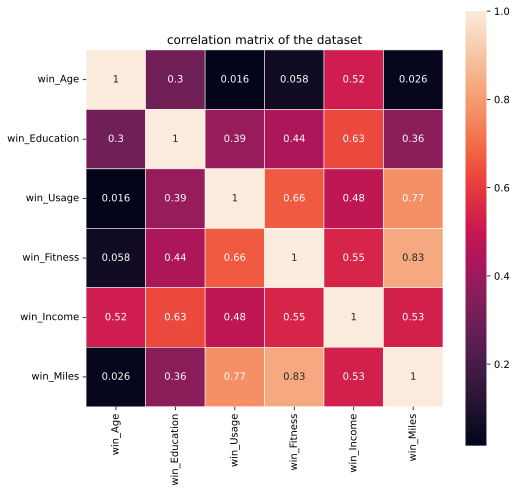

In [32]:
## Correlation matrix of the dataset

corrmat_cdf2 = cdf2.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corrmat_cdf2, square=True, annot=True, linewidths=0.5)
plt.title("correlation matrix of the dataset")

plt.show()

* Miles strongly correlates to Usage (0.77)
* Miles correlates to Fitness (0.83)
* Income correlates highly with Education (0.63)
* Fitness correlates highly with Usage (0.66)

In [33]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 3),
            textcoords="offset points",
        )  # annotate the percentage
        
    # Adjust the font size of the tick labels
        ax.tick_params(labelsize=8)
   

    plt.show()  # show the plot

In [35]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
#Lets crate a combined Boxplot and Distplot

def histogram_boxplot(feature, figsize=(5,3), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,          # Number of rows of the subplot grid= 2
                                           sharex = True,       # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )                    # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--')   # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

## Exploratory Data Analysis (EDA)

### Univariate Analysis

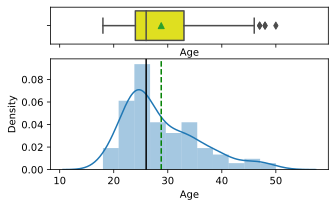

In [37]:
histogram_boxplot(cdf1.Age)

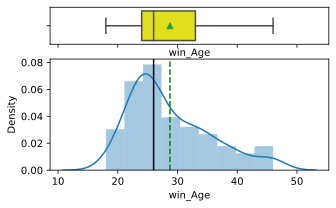

In [38]:
histogram_boxplot(cdf2.win_Age)

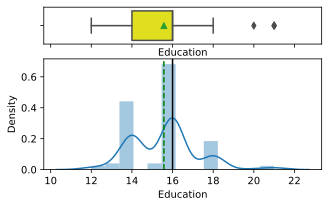

In [39]:
histogram_boxplot(cdf1.Education)

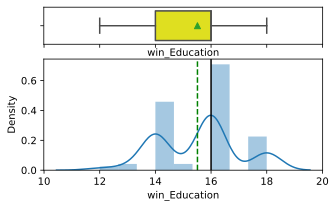

In [40]:
histogram_boxplot(cdf2.win_Education)

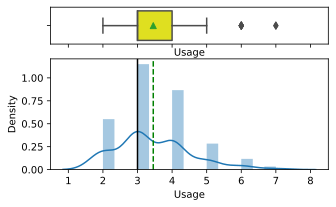

In [41]:
histogram_boxplot(cdf1.Usage)

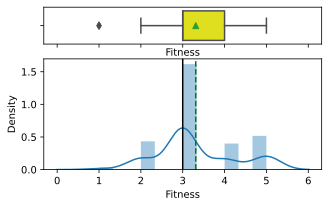

In [42]:
histogram_boxplot(cdf1.Fitness)

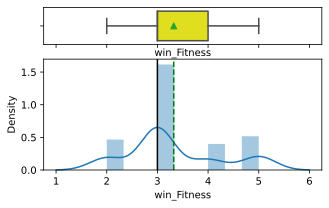

In [43]:
histogram_boxplot(cdf2.win_Fitness)

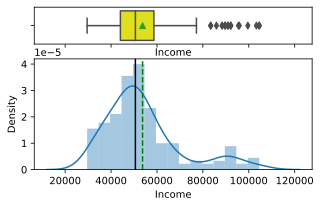

In [44]:
histogram_boxplot(cdf1.Income)

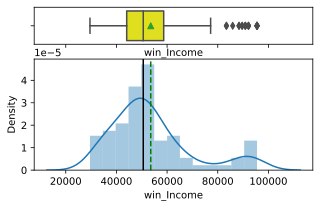

In [45]:
histogram_boxplot(cdf2.win_Income)

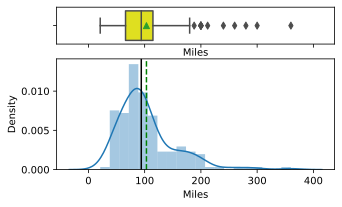

In [46]:
histogram_boxplot(cdf1.Miles)

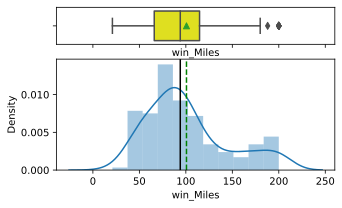

In [47]:
histogram_boxplot(cdf2.win_Miles)

Assuming there is no sampling bias, overall, TM fitness products are popular with
* 24-33 years age range; 26 years being typical
* Income range 44K to 59K; 51K being typical
* 14-16 years education; with 16 being typical (college)
* Fitness level 3 being most typical (medium fitness)

Small bimodality in Income and Fitness, and skewness toward higher Age and Miles. ****Although those appear as outliers,


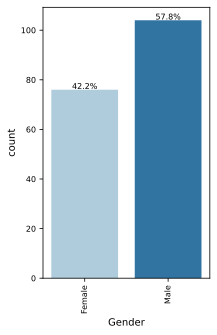

In [48]:
labeled_barplot(cdf2, "Gender", perc=True)

* There are more male customers (57.8%) compared to female customers (42.2%) for the treadmill products.

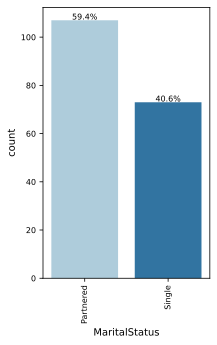

In [49]:
labeled_barplot(cdf2, "MaritalStatus", perc=True)

* There are more partnered customers (59.4%) compared to single customers (40.6%) who are purchasing the treadmills.

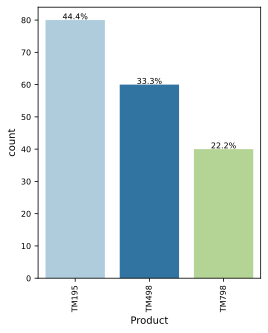

In [50]:
labeled_barplot(cdf2, "Product", perc=True)

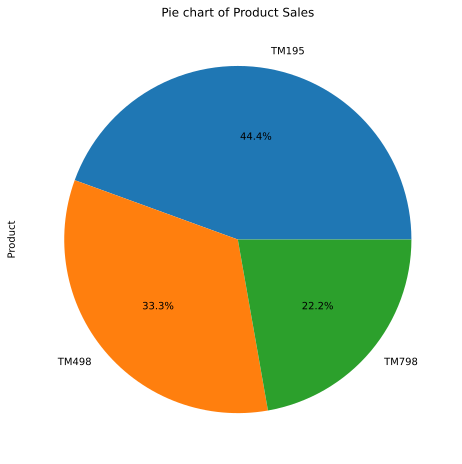

In [51]:
#categorical variables 
plt.figure(figsize=(14,7))
cdf2['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

* Comparison between the 3 treadmill products show that TM195 is the most popular (44.4%) followed by TM498 (33.3%) and TM798 (22.2%)

### Bivariate Analysis

<AxesSubplot:xlabel='win_Age', ylabel='Product'>

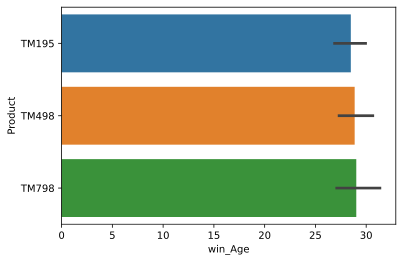

In [52]:
sns.barplot(x="win_Age", y="Product", data=cdf2)

* Customer age is similar across the product 

<AxesSubplot:xlabel='win_Education', ylabel='Product'>

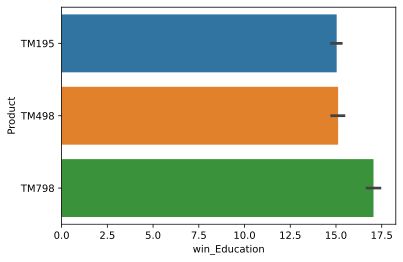

In [53]:
sns.barplot(x="win_Education", y="Product", data=cdf2)

* Customers who have spent more years in education prefer TM798
* Customers have similar years of education choose TM498 and TM195. 

<AxesSubplot:xlabel='win_Usage', ylabel='Product'>

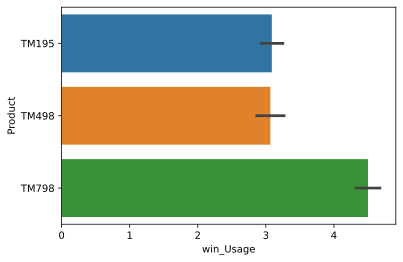

In [54]:
sns.barplot(x="win_Usage", y="Product", data=cdf2)

* TM798 usage is more times/week (>4). 
* TM498 and TM195 show similar usage times/week.

<AxesSubplot:xlabel='win_Fitness', ylabel='Product'>

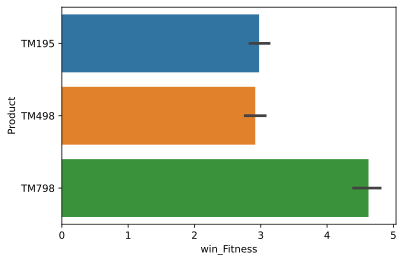

In [55]:
sns.barplot(x="win_Fitness", y="Product", data=cdf2)

* TM798 has a higher fitness score (>4).
* TM195 and TM498 have similar fitness score (~3).

<AxesSubplot:xlabel='win_Income', ylabel='Product'>

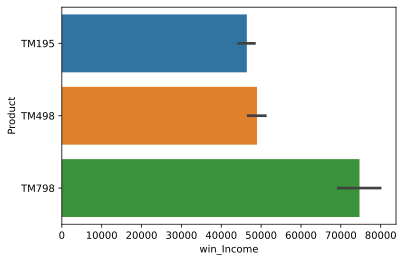

In [56]:
sns.barplot(x="win_Income", y="Product", data=cdf2)

* TM798 is more popular in higher income groups.

<AxesSubplot:xlabel='win_Miles', ylabel='Product'>

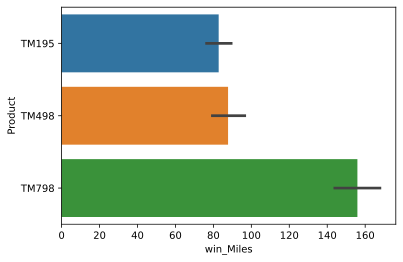

In [57]:
sns.barplot(x="win_Miles", y="Product", data=cdf2)

* Customers who purchased TM798 walk/run more miles.
* Customers using TM 195 and TM498 products walk/run similar miles.

Product  TM195  TM498  TM798  All
Gender                           
All         80     60     40  180
Male        40     31     33  104
Female      40     29      7   76
------------------------------------------------------------------------------------------------------------------------


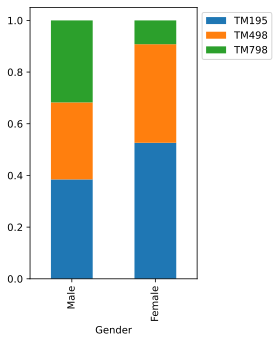

In [58]:
stacked_barplot(cdf2, "Gender", "Product")

* Males use more of TM798 than the female customers. Female customers use more of the TM195 than the maale customers.

Product        TM195  TM498  TM798  All
MaritalStatus                          
All               80     60     40  180
Partnered         48     36     23  107
Single            32     24     17   73
------------------------------------------------------------------------------------------------------------------------


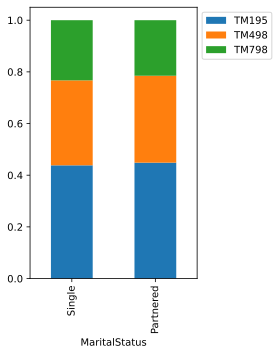

In [59]:
stacked_barplot(cdf2, "MaritalStatus", "Product")

* There is no differnece between single and partnered people in terms of product usage

<AxesSubplot:xlabel='Gender', ylabel='count'>

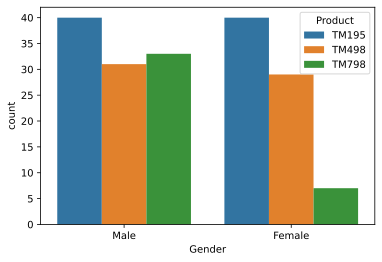

In [60]:
sns.countplot(data=cdf2, x="Gender", hue="Product")

* TM195 and TM498 is equally popular amongst male and female. 
* TM798 is heavily popular among the male population compared to the female. 
* Females prefer more TM195 and TM498

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

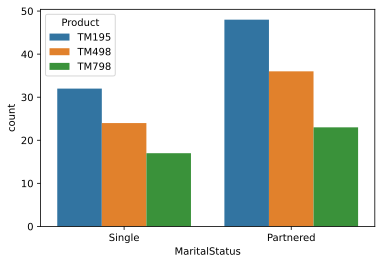

In [61]:
sns.countplot(data=cdf2, x="MaritalStatus", hue="Product")

* Overall the Partnered population have more product purchase than the single population. 
* TM195,TM498 are also favored by the partnered customers. 

<AxesSubplot:xlabel='Gender', ylabel='win_Age'>

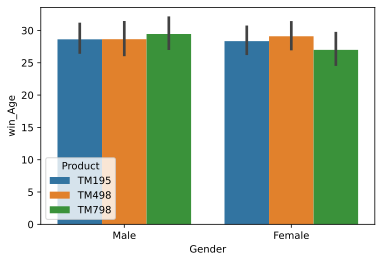

In [62]:
sns.barplot(data=cdf2, x="Gender", y="win_Age", hue="Product")

Comparison of the product usage between males and females based on their age show that
* TM195 has similar usage bewteen males and females
* TM498 is more preferred by females than males of similar age
* TM798 is more preferred by males.

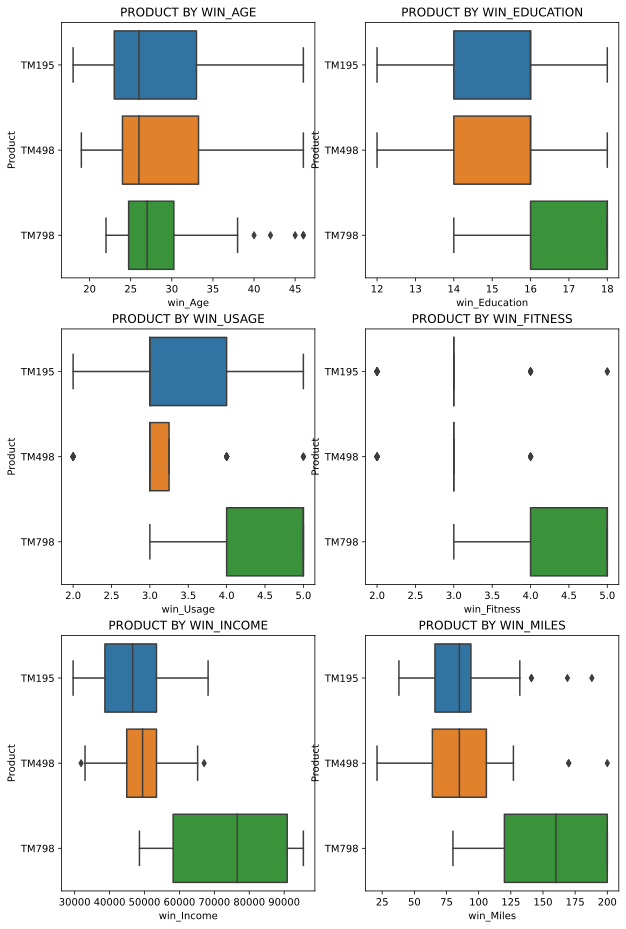

In [86]:
#Bi Varaite Analysis for 
#1.Product & Age
#2.Product & Education
#3.Product & Usage
#4.Product & Fitness
#5.Product & Income
#6.Product & Miles
fig1, axes1 =plt.subplots(3,2,figsize=(10, 16))
list1_col=['win_Age','win_Education', 'win_Usage', 'win_Fitness', 'win_Income','win_Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2    
    ax=axes1[row,col]
    
    sns.boxplot(cdf2[list1_col[i]],cdf2['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )
    

* Age of the customers buying TM195 and TM498 is between 23-34, whereas customers buying TM798 are primarily in 25-30
* Customers with 14-16 yrs of education have purchased TM195 and TM 498 wheresas customers with 16-18 yrs of eduaction have purchased the TM798 model.
* Customer with TM195 model use the treadmill 3-4 times/week and have an average fitness of 3 and some unfits.
* Customers with TM498 model use the treadmill less frequently but have an average fitness of 3 and some unfits.
* Customer with TM798 model use the treadmill more frequently 4-5 times/week, and have high self rated fitness (between 4-5).
* Customers with lower income purchase TM195 and TM498 model and  customers with higher income purchase TM798 model.

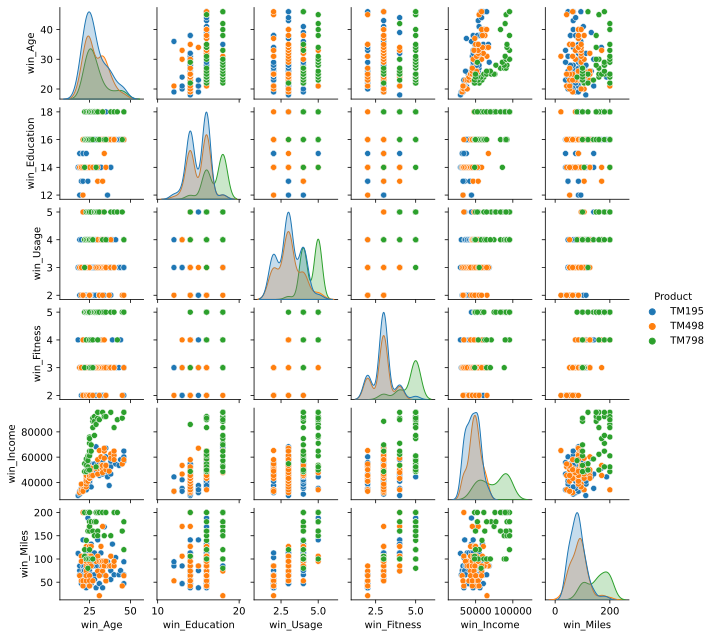

In [64]:
sns.pairplot(cdf2, hue='Product', size =1.5) # check all data, the whole numeric set of data at one time w.r.t. Gender

* TM798 customers are different than TM195 and TM498

** Lets investigate the scatterplots in detail below



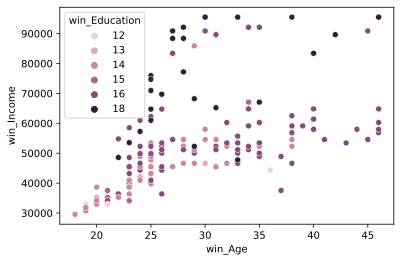

In [65]:
ax=sns.scatterplot(x='win_Age', y='win_Income', data=cdf2, hue='win_Education')

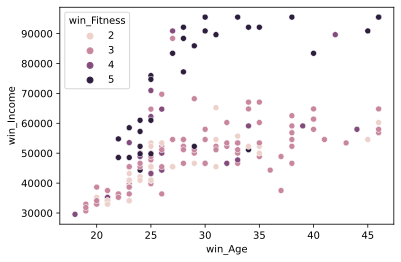

In [66]:
ax=sns.scatterplot(x='win_Age', y='win_Income', data=cdf2, hue='win_Fitness')

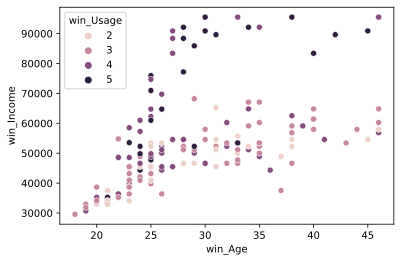

In [67]:
ax=sns.scatterplot(x='win_Age', y='win_Income', data=cdf2, hue='win_Usage')

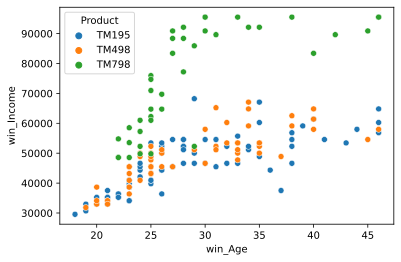

In [68]:
ax=sns.scatterplot(x='win_Age', y='win_Income', data=cdf2, hue='Product')

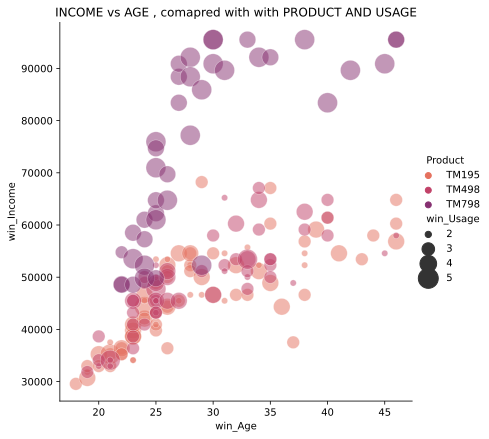

In [81]:
#scatter plot between income, age ,product and usage
sns.relplot(x="win_Age", y="win_Income", hue="Product", size="win_Usage",
            sizes=(40, 400), alpha=.5, palette="flare",
            height=6, data=cdf2).set(title='INCOME vs AGE , comapred with with PRODUCT AND USAGE');

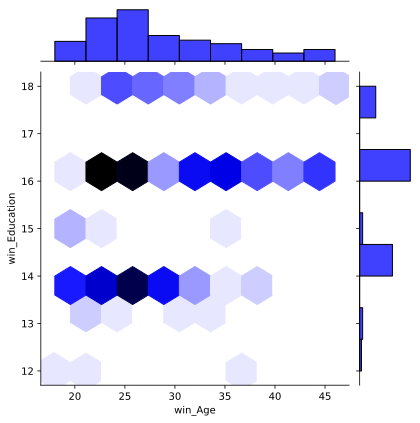

In [87]:
#Bivariate Analysis Age & Education
sns.jointplot(x = 'win_Age',y = 'win_Education', data = cdf2, color="blue",kind='hex')

<Figure size 432x216 with 0 Axes>

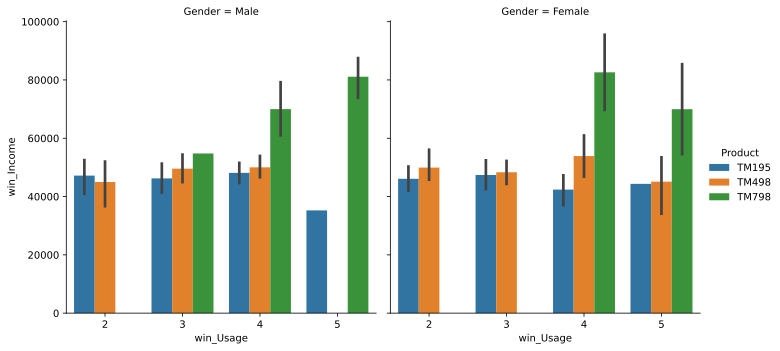

In [82]:
plt.figure(figsize=(6,3))
sns.catplot(x='win_Usage', y='win_Income', col='Gender',hue='Product' ,kind="bar", data=cdf2) 

1. Younger customers having higher income also has generally higher Education (16-21) – lets call it Group2 
2. Group2 is characterized by higher Fitness
3. Group2 is characterized by high Usage
4. Higher Education, high income group characterized by higher Fitness (and higher Usage) also expect Miles higher than 125
5. The high income young group with higher fitness characterizes customers of the TN798

## SUMMARY of OBERVATIONS and INSIGHTS 

* Three main products: TM195, TM498, and TM798
* TM798 customers are different than TM195 and TM498
* TM798 appears to have distinct specifications to attract customers with higher education, income and have high fitness. 
* TM195 and TM498 appears to be attracting similar customers – this needs analysis on product details. To investigate if this is due to product specifications or due to marketing.
* TM195 & TM498 attracts people with income less than 60k , may be because of the cost of the models. 

### RECOMMENDATIONS:

* TM195 & TM498 can be marketed as budget Treadmills.
* TM798 can be marketed as a high end Treadmill, thus creating a luxiurous brand. Can target professionals and athletes to have a high margin of profit. 
* Focus on marketing TM798 to female customers with high income and high fitness.
* The age range of our customers are between 18-35 years. Can research to investigate if there is any scope to increase sale with customers more than 35 years.